### ROC Curve (Receiver Operator Characteristic)
- Recall과 FallOut을 이용한 Curve

In [8]:
from sklearn.metrics import *
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=10000, weights=[0.9, 0.1], random_state =1)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

model1 = LogisticRegression().fit(X, y)
y_hat1 = model1.predict(X)

model2 = SVC(gamma=0.0026, C=10, probability=True).fit(X, y)
y_hat2 = model2.predict(X)

In [9]:
print(confusion_matrix(y, y_hat1))

[[8853   94]
 [ 397  656]]


In [10]:
print(confusion_matrix(y, y_hat2))

[[8894   53]
 [ 397  656]]


In [12]:
print(classification_report(y, model1.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.97      8947
          1       0.87      0.62      0.73      1053

avg / total       0.95      0.95      0.95     10000



In [13]:
print(classification_report(y, model2.predict(X)))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98      8947
          1       0.93      0.62      0.74      1053

avg / total       0.95      0.95      0.95     10000



In [15]:
from sklearn.metrics import roc_curve

fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds2 = roc_curve(y, model2.decision_function(X))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


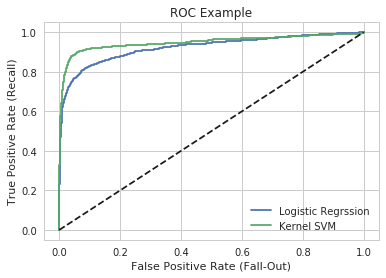

In [18]:
%matplotlib inline
plt.plot(fpr1, tpr1, label = 'Logistic Regrssion')
plt.plot(fpr2, tpr2, label = 'Kernel SVM')
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label= 'random guess')
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Example')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


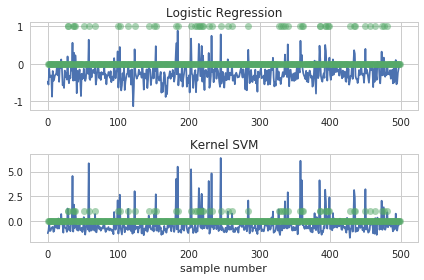

In [20]:
N = 500

plt.subplot(211)
plt.plot(model1.decision_function(X[:N] * 0.1 + 1))
plt.plot(y[:N], 'o', alpha= 0.5)
plt.title("Logistic Regression")

plt.subplot(212)
plt.plot(model2.decision_function(X[:N]) + 1)
plt.plot(y[:N], 'o', alpha=0.5)
plt.title('Kernel SVM')
plt.xlabel('sample number')

plt.tight_layout()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


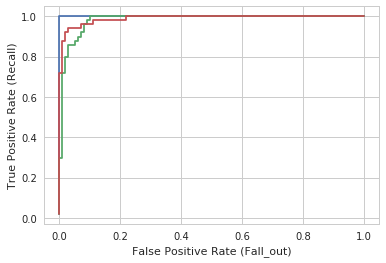

In [22]:
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

iris = load_iris()
X = iris.data
y = label_binarize(iris.target, [0, 1, 2])

fpr = [None] * 3
tpr = [None] * 3
thr = [None] * 3

for i in range(3):
    model = GaussianNB().fit(X, y[:, i])
    fpr[i], tpr[i], thr[i] = roc_curve(y[:, i], model.predict_proba(X)[:, 1])
    plt.plot(fpr[i], tpr[i])
    
plt.xlabel('False Positive Rate (Fall_out)')
plt.ylabel('True Positive Rate (Recall)')
plt.show()

## AUC (Area Under the Curve)
- AUC는 ROC Curve의 면적을 뜻한다. Fall-Out 대비 Recall 값이 클 수록 AUC가 1에 가까운 갓ㅂ이며 민감한 모형이다.

In [26]:
from sklearn.metrics import auc
auc(fpr1, tpr1), auc(fpr2, tpr2)

(0.9227893798140808, 0.9486326091892203)

In [33]:
fpr1.shape, tpr1.shape

((829,), (829,))